**Problem Statement Scipy:We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.**

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Min and max temperature')

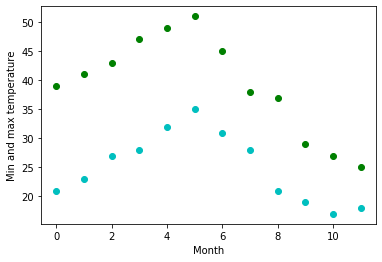

In [40]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [43]:
# Fitting  to a periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Temperature ($^\\circ$C)')

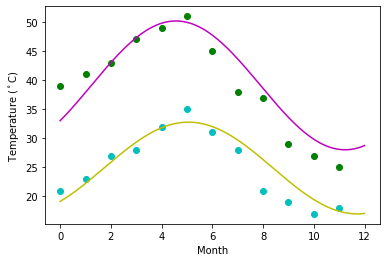

In [42]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

**Matplotlib:This assignment is for visualization using matplotlib:**

**data to use:url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv**

**titanic = pd.read_csv(url)**

**Charts to plot:**

**1.Create a pie chart presenting the male/female proportion**

**2.Create a scatterplot with the Fare paid and the Age, differ the plot color by gender**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [90]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [69]:
count=titanic['sex'].value_counts()
labels=count.index.values.tolist()
values=count.values.tolist()
labels
values

['male', 'female']

[843, 466]

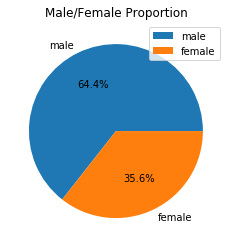

In [70]:
plt.pie(values,labels=labels,autopct='%.1f%%')
plt.title('Male/Female Proportion')
plt.legend()
plt.show();

In [96]:
titanic.dropna(axis=0,subset=['sex'],inplace=True)

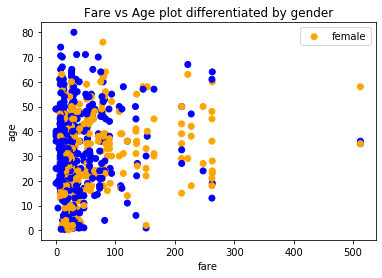

In [112]:
colors = {'male':'blue', 'female':'orange'}
plt.scatter(titanic['fare'],titanic['age'],c=titanic['sex'].apply(lambda x: colors[x]))
plt.xlabel('fare')
plt.ylabel('age')
plt.title("Fare vs Age plot differentiated by gender")
plt.legend(titanic['sex'])
plt.show();